In [1]:
pwd

'C:\\Users\\HP'

In [4]:
cd C:\Users\HP\Downloads

C:\Users\HP\Downloads


In [5]:
import pandas as pd
df = pd.read_csv('Students Social Media Addiction.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [9]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [10]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [11]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### Correlation Studies

In [13]:
from scipy.stats import pearsonr

# Correlation between usage hours and mental health
corr_mh, p_mh = pearsonr(df['Avg_Daily_Usage_Hours'], df['Mental_Health_Score'])
print(f"Correlation (Usage vs Mental Health): {corr_mh:.3f}, P-value: {p_mh:.4f}")

# Correlation between usage hours and sleep hours
corr_sleep, p_sleep = pearsonr(df['Avg_Daily_Usage_Hours'], df['Sleep_Hours_Per_Night'])
print(f"Correlation (Usage vs Sleep): {corr_sleep:.3f}, P-value: {p_sleep:.4f}")

Correlation (Usage vs Mental Health): -0.801, P-value: 0.0000
Correlation (Usage vs Sleep): -0.791, P-value: 0.0000


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


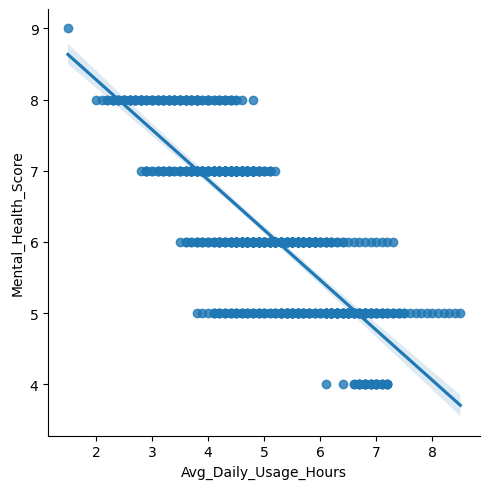

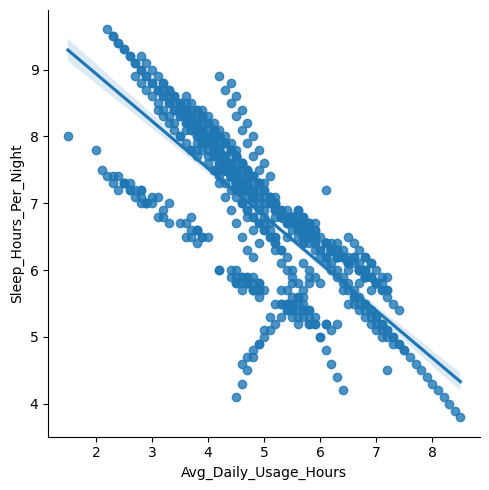

In [14]:
# Generating visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df)
sns.lmplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df)
plt.show()

### Predictive Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical data (category to numerical transformation)
df['Most_Used_Platform'] = LabelEncoder().fit_transform(df['Most_Used_Platform'])

# Features and target
X = df[['Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']]
y = df['Conflicts_Over_Social_Media']

# Train data and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% data for test data

# I use Random Forest Classifier model here
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.900709219858156
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.70      0.82        10
           2       0.87      0.93      0.90        43
           3       0.87      0.92      0.89        50
           4       0.97      0.88      0.92        34
           5       1.00      1.00      1.00         3

    accuracy                           0.90       141
   macro avg       0.95      0.91      0.92       141
weighted avg       0.91      0.90      0.90       141



### Clustering

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


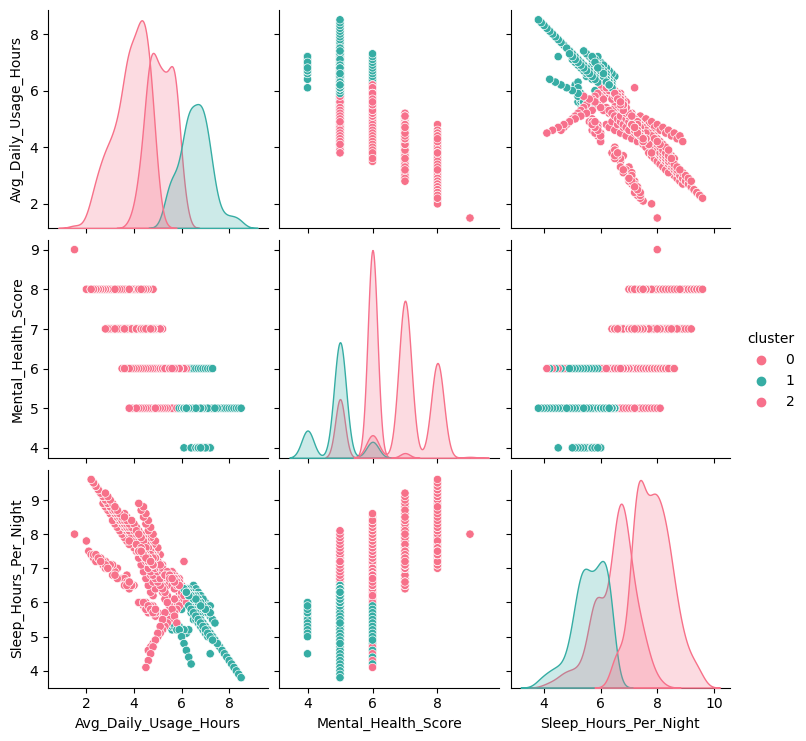

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Avg_Daily_Usage_Hours', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']
X_scaled = StandardScaler().fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, vars=features, hue='cluster', palette='husl')
plt.show()

In [18]:
cluster_summary = df.groupby(['cluster', 'Country'])[features].mean()
print(cluster_summary)

                      Avg_Daily_Usage_Hours  Mental_Health_Score  \
cluster Country                                                    
0       Afghanistan                2.900000             7.000000   
        Australia                  4.361538             7.076923   
        Bahamas                    2.800000             8.000000   
        Bahrain                    2.800000             8.000000   
        Belarus                    2.500000             8.000000   
...                                     ...                  ...   
2       UK                         5.200000             6.000000   
        USA                        5.487500             6.000000   
        Ukraine                    4.900000             6.000000   
        Vatican City               4.400000             6.000000   
        Yemen                      4.700000             6.000000   

                      Sleep_Hours_Per_Night  
cluster Country                              
0       Afghanistan    

### Data Visualization

<Axes: >

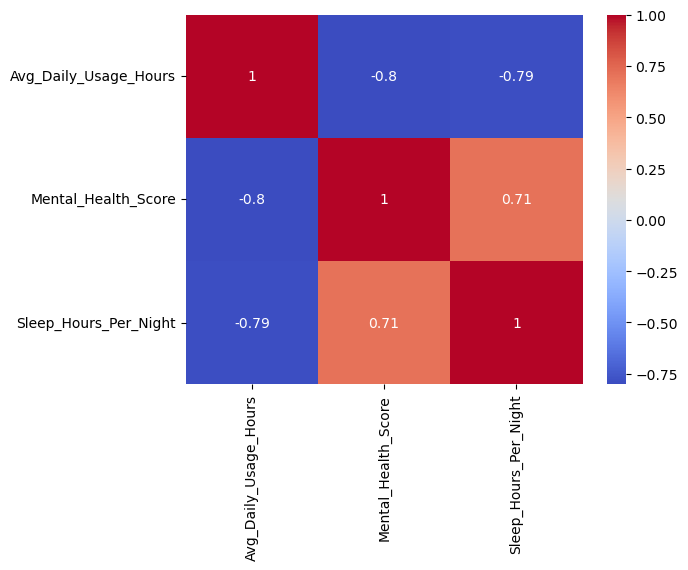

In [19]:
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Most_Used_Platform', ylabel='Avg_Daily_Usage_Hours'>

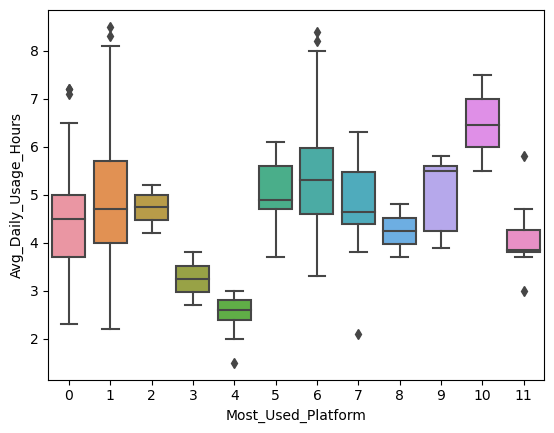

In [21]:
sns.boxplot(x='Most_Used_Platform', y='Avg_Daily_Usage_Hours', data=df)